#Apache Cassandra

### Itis a highly scalable, distributed NoSQL database known for its fault tolerance, high availability, and ability to handle massive amounts of data. It was originally developed at Facebook and later open-sourced in 2008.

**Key features and benefits of Apache Cassandra:**

•  **Scalability**: Cassandra can easily scale horizontally by adding more nodes to the cluster, allowing for seamless growth as your data and workload increase.

•  **Fault tolerance**: It is designed to tolerate node failures without compromising data availability.

•  **High availability**: Cassandra ensures continuous operation, even in the event of hardware failures or network disruptions.

•  **Performance**: It offers excellent read and write performance, making it suitable for demanding applications.

•  **Flexibility**: Cassandra's flexible schema model allows you to easily add or modify data without requiring downtime or schema migrations.

•  **Distributed nature**: It is distributed across multiple nodes, providing redundancy and fault tolerance.

•  **Open source**: Cassandra is freely available and has a large and active community.

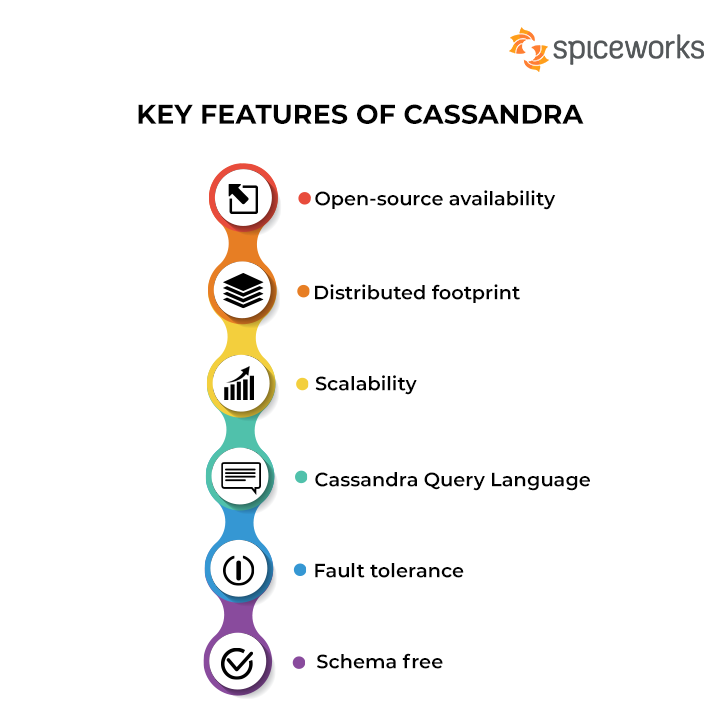

**Common use cases for Apache Cassandra:**

• **Real-time analytics**: Processing large volumes of data in real time for applications like fraud detection, recommendation systems, and IoT data analysis.

• **Time series data**: Storing and analyzing time-stamped data, such as sensor readings, financial data, and log files.

• **Content management systems**: Managing large-scale content repositories, including media streaming, e-commerce platforms, and social media applications.

• **Gaming**: Handling high-volume, low-latency data for online gaming applications.

• **Financial services**: Managing risk, fraud detection, and real-time trading data.

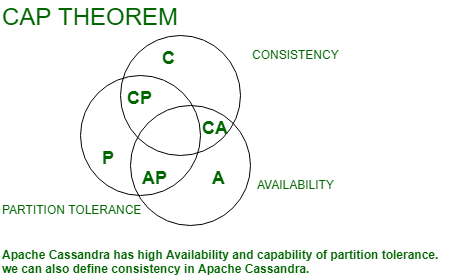

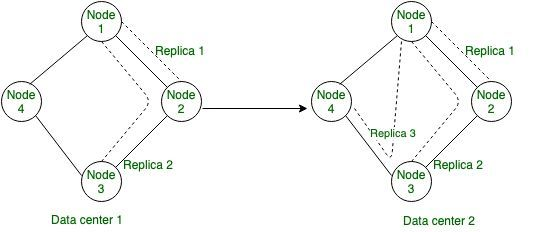

Install DataStax Python Driver

In [57]:
pip install cassandra-driver

In [58]:
import cassandra
print(cassandra.__version__)

3.29.2


In [59]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
         'secure_connect_bundle': '/content/drive/MyDrive/ML and DL DataSets/secure-connect-cassandra-practice.zip'
}
auth_provider = PlainTextAuthProvider('nbkbFnURhqcGIQzOOTJgWlrS', 't.15fArilQeS+Fr5IRRetJUrynFXIJo,_4MviT.mrxzrR_nYqRMKt-tEKyW4IRk-C5mJ6ZNQTiSCeF8Ti2_EINFMQ4nAxEcoTNmS53d.DfTiFZMpFPvrXea0.mtQ0MjA')
cluster = Cluster(cloud = cloud_config, auth_provider = auth_provider, protocol_version = 3)
session = cluster.connect()

result = session.execute("select release_version from system.local")

row = result.one()

print('This is row num:', row)
if row:
      print('This is row num of 1st index:', row[0]) # Row has only 1 index value
else:
      print("An error occurred.")

This is row num: Row(release_version='4.0.11-df8e587a0e77')
This is row num of 1st index: 4.0.11-df8e587a0e77


**Keyspace**: It is an essentially a container for your data. It's analogous to a database in a traditional relational database system. Each keyspace can have multiple tables, and each table stores data related to a specific entity or concept.

In Cassandra:

Database name = Cluster

Namespaces / Keyspace = Organize data of Database

**Serverless (Vector) databases:**

• Designed for vector search applications, such as Generative AI (GenAI), semantic search, and geospatial search.

• Stores vector embeddings alongside non-vector tabular data.

**Serverless (Non-Vector) databases:**

• Designed for generic applications, such as content management, user authentication, and transactional applications.

**Serverless (Vector) databases    	Serverless (Non-Vector) databases**

Namespace...........................Keyspace

Collection...............................Table

Document...............................Row

Field........................................Column

**Key points about keyspaces:**

• **Organization:** They provide a logical way to organize your data within a Cassandra cluster.

• **Isolation:** Each keyspace is isolated from other keyspaces, ensuring data privacy and security.

• **Replication:** You can configure replication factors for each keyspace to determine how many copies of your data are stored across the cluster for redundancy and fault tolerance.

• **Consistency:** Keyspaces also define the consistency level for read and write operations, controlling how many replicas must be involved in a query to ensure data accuracy.

• **Naming:** Keyspace names must adhere to specific naming conventions, typically consisting of alphanumeric characters, underscores, and hyphens.

In [60]:
# Command to use a keyspace
try:
    query = "use default_keyspace"
    session.execute(query)
    print("Inside the default_keyspace")

except Exception as err:
    print("Exception Occured while using Keyspace : ",err)

Inside the default_keyspace


**Collections:**

Cassandra offers a flexible data model that allows you to store various types of data within a single column. These data types are referred to as collections. They provide a way to store structured data efficiently within a single column, making it easier to manage and query.

**Types of Collections in Cassandra:**

• **List:**

  o Ordered collection: Elements are stored in a specific order.

  o Can contain any data type: Including other collections.
  
  o Example: Storing a list of email addresses for a user.

• **Set:**

  o Unordered collection: Elements are stored without a specific order.

  o Unique elements: No duplicate elements are allowed.

  o Example: Storing a set of tags associated with a blog post.

• **Map:**

  o Associative collection: Key-value pairs are stored.

  o Keys must be unique: Values can be duplicates.

  o Example: Storing a map of user preferences where keys are preference names and values are corresponding values.

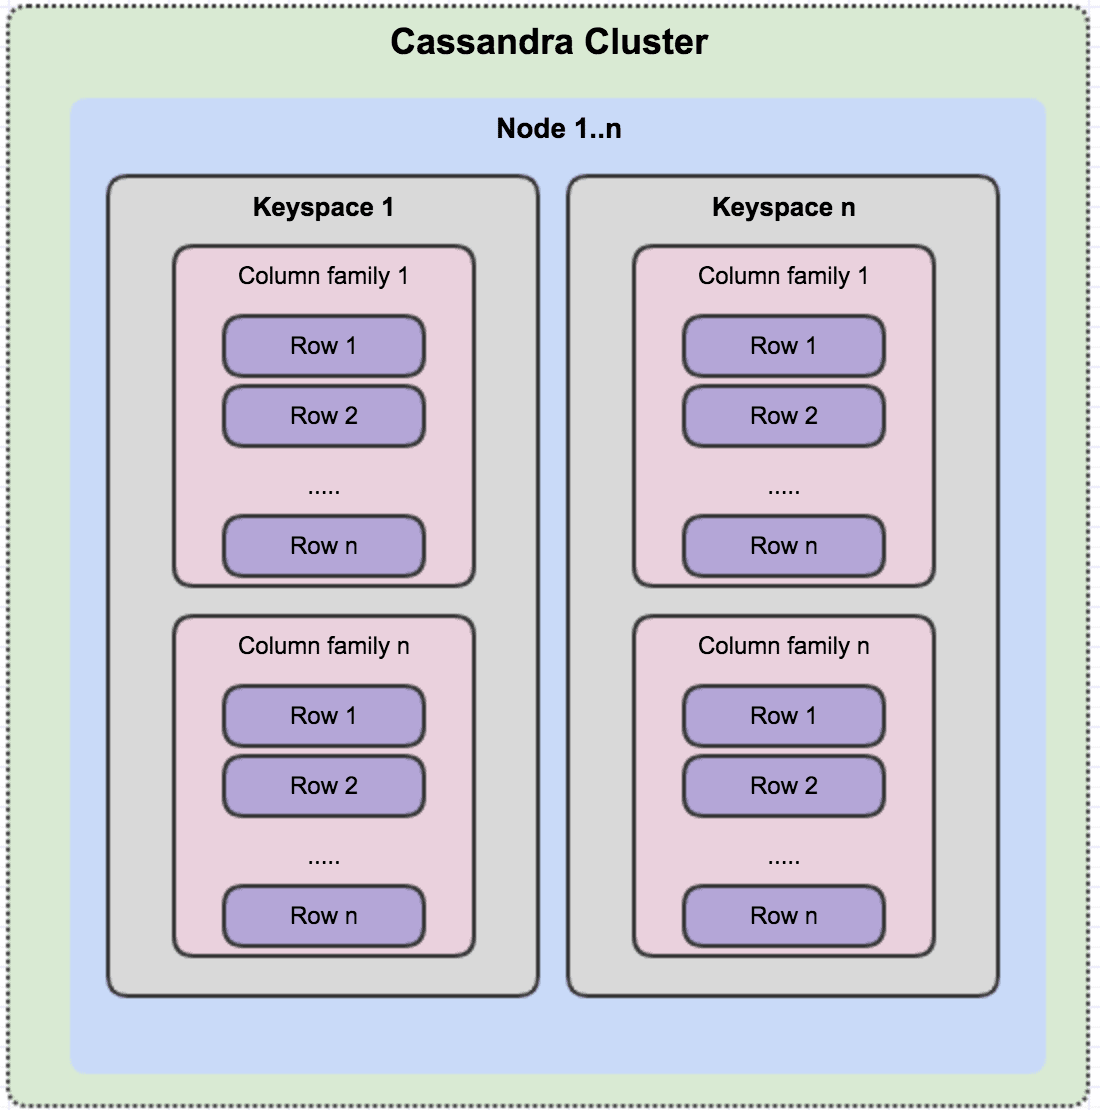

**Key Components of the Cassandra Ring Architecture:**

• Nodes:

  o Each node in the cluster is a standalone server that can store, replicate, and retrieve data.

  o Nodes work together to form the ring topology.

• Token Ring:

  o A logical ring is created where each node is assigned a unique token.
Tokens are numerical values that determine the distribution of data across the cluster.

  o Data is partitioned based on its hash value, and the resulting hash is compared to the node tokens to determine where it should be stored.

• Replication:

  o Cassandra replicates data across multiple nodes for fault tolerance and performance.

  o Replication factor determines the number of copies of a data item.
Data is typically replicated in a consistent manner across the ring to ensure data availability.

• Gossip Protocol:

  o Cassandra uses the gossip protocol for communication between nodes.
Nodes exchange information about the cluster state, including node membership, token assignments, and data distribution.

  o This helps maintain consistency and ensures that the ring topology remains up-to-date.

• Partitioner:

  o The partitioner is responsible for determining how data is distributed across the ring based on its hash value.

  o Cassandra provides several partitioner options, including Murmur3Partitioner, RandomPartitioner, and ByteOrderedPartitioner.

**How the Ring Works:**

• **Data Insertion:**

  o When a new data item is inserted, its hash value is calculated.

  o The partitioner determines the node responsible for storing the data based on the hash value and the node tokens.

  o The data is replicated to the specified number of nodes on the ring.

• **Data Retrieval:**

  o When a data item is retrieved, its hash value is calculated.

  o The partitioner determines the responsible node.

  o The data is retrieved from that node and potentially from its replicas if necessary.

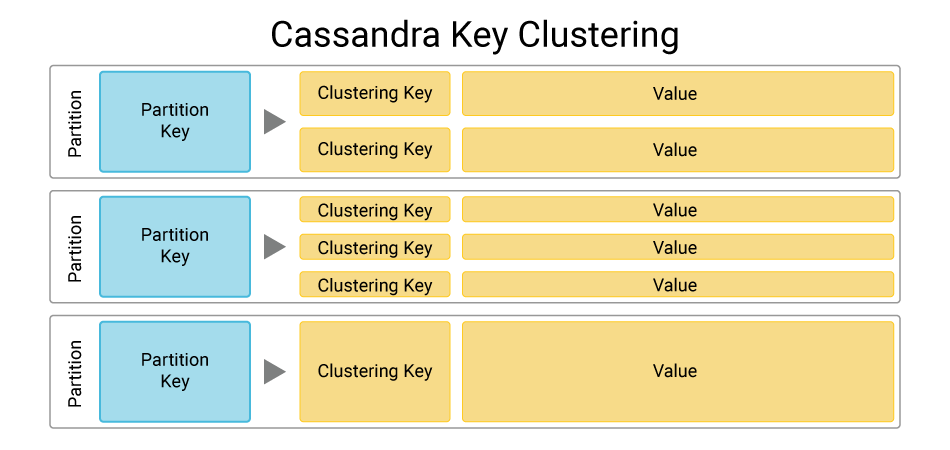

**Types of Keys in Cassandra:**

**1. Partition Key:**

• **Purpose:** Determines the data partition that a row belongs to.

• **Distribution:** Rows with the same partition key value are stored on the same node in the cluster.

• **Importance:** The partition key is crucial for data distribution and query performance.

• **Best Practices:**

  o Choose a column that has a wide range of values to distribute data evenly.

  o Avoid using columns with a small number of unique values.

**2. Clustering Key:**

• **Purpose:** Defines the order of rows within a partition.

• **Distribution:** Rows with the same partition key but different clustering key values are stored in sorted order within the same partition.

• **Importance:** Clustering keys are used for range queries and secondary indexes.

• **Best Practices:**

  o Choose clustering keys that are frequently used in range queries.

  o Consider the data distribution and query patterns when designing clustering keys.

# **Create Table**

In [61]:
# Command to create a table inside a Keyspace

try:
    query = """create table employee(
                emp_id int,
                emp_name varchar,
                emp_salary int,
                emp_dept varchar,
                emp_email varchar,
                emp_phone varchar,
                primary key (emp_id, emp_dept)
              )"""  # emp_id is partition key and emp_dept is clustering key
# Also we can write composite partition key through:              primary key ((emp_id, emp_name) emp_dept)

    session.execute(query)
    print("Table created inside the keyspace")

except Exception as err:
    print("Exception Occured while creating the table : ",err)

Exception Occured while creating the table :  Table 'default_keyspace.employee' already exists


# **Alter Table**

In [62]:
# Alter the table in cassandra to drop a column
try:
    query = """alter table
               employee
               drop emp_email"""  # Also we can write in same line

    session.execute(query)
    print("Column dropped successfully from the table !!")

except Exception as err:
    print("Exception Occured while dropping the column: ",err)

Column dropped successfully from the table !!


In [63]:
# Alter the table in cassandra to add a new column
try:
    query = """alter table
               employee
               add emp_email text"""

    session.execute(query)
    print("Column added successfully in the table!!")

except Exception as err:
    print("Exception Occured while adding the column: ",err)

Column added successfully in the table!!


# **Insert data in Table**

In [64]:
# Insert data into cassandra table

try:
    query = """insert into employee
               (emp_id, emp_name, emp_salary, emp_dept, emp_email, emp_phone)
               values
               (1, 'Subha', 20000, 'Software', 'soft@gmail.com','+91 9999999990')"""

    session.execute(query)
    print("Record inserted successfully !!")

except Exception as err:
    print("Exception Occured while inserting the data into table: ",err)

Record inserted successfully !!


In [65]:
# Insert multiple data into cassandra table

try:
    queries = [
        "INSERT INTO employee (emp_id, emp_name, emp_salary, emp_dept, emp_email, emp_phone) VALUES (2, 'Subhajit', 1000, 'Programmer', 'program@gmail.com', '+91 9999999909')",
        "INSERT INTO employee (emp_id, emp_name, emp_salary, emp_dept, emp_email, emp_phone) VALUES (3, 'S.Das', 100000, 'Data Scientist', 'data@gmail.com', '+91 9999999099')"
    ]

    for query in queries:
        session.execute(query)
    print("Record inserted successfully !!")

except Exception as err:
    print("Exception Occured while inserting the data into table: ",err)

Record inserted successfully !!


# **Perfrom Queary in Table**

In [66]:
# Select query on cassandra table
try:
    query = "select * from employee"
    result = session.execute(query)

    for row in result:
        print(row)

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Row(emp_id=1, emp_dept='Software', emp_email='soft@gmail.com', emp_name='Subha', emp_phone='+91 9999999990', emp_salary=20000)
Row(emp_id=2, emp_dept='Programmer', emp_email='program@gmail.com', emp_name='Subhajit', emp_phone='+91 9999999909', emp_salary=1000)
Row(emp_id=3, emp_dept='Data Scientist', emp_email='data@gmail.com', emp_name='S.Das', emp_phone='+91 9999999099', emp_salary=100000)


In [67]:
# Select query for specific columns in cassandra table

try:
    query = """select
               emp_id, emp_name
               from employee"""
    result = session.execute(query)

    for row in result:
        print(row)

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Row(emp_id=1, emp_name='Subha')
Row(emp_id=2, emp_name='Subhajit')
Row(emp_id=3, emp_name='S.Das')


In [68]:
# Select query for specific columns in cassandra table and how to access from Row object

try:
    query = """select
               emp_id, emp_name
               from employee"""
    result = session.execute(query)

    for row in result:
        print("Emp ID : ", row[0]) # Here, in row we have to specify the index number, if we give column name directly it will through error
        print("Emp Name : ", row[1])
        print()

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Emp ID :  1
Emp Name :  Subha

Emp ID :  2
Emp Name :  Subhajit

Emp ID :  3
Emp Name :  S.Das



# **Aggregate Functions in CQL**

In [69]:
# Write a query to get total count of employees

try:
    query = """select count(*)
               from employee"""
    result = session.execute(query)
    row = result.one()

    print(row)
    print(row[0])

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Row(count=3)
3


In [70]:
# Write a query to find maximum salary from employee table
try:
    query = """select max(emp_salary)
              as max_salary from employee"""
    result = session.execute(query)
    row = result.one()

    print(row)
    print(row[0])

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Row(max_salary=100000)
100000


# **Where Clause in CQL**

**Rules for where clause** - We have to follow any one rule.

1.) Partition Key (Single or Composite)

2.) If Cluster column  used in where clause then it should be with Partition Key

3.) A column on which we have applied the index

4.) A column which is not part of partition key or index column or clustering column then we can use where clause but we have to use keyword
**ALLOW FILTERING** - it will be a super slow performance when data volume is very high

In [71]:
# where clause for Partition key only or Rule no - 1

try:
    query = """select * from employee
               where emp_id = 2"""
    # Emp_id is our partition key. If we passed multiple_partition_key / composite_key it will also execute

    result = session.execute(query)
    row = result.one()

    print(row)

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Row(emp_id=2, emp_dept='Programmer', emp_email='program@gmail.com', emp_name='Subhajit', emp_phone='+91 9999999909', emp_salary=1000)


In [72]:
# where clause for Clustering key only or Rule no - 2

try:
    query = """select * from employee
               where emp_dept = 'Software' and emp_id=1"""
     # Here, we are using 'emp_dept' Clustering key with 'emp_id' Partition key. That's the reason it's not showing any error

    result = session.execute(query)
    row = result.one()

    print(row)

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Row(emp_id=1, emp_dept='Software', emp_email='soft@gmail.com', emp_name='Subha', emp_phone='+91 9999999990', emp_salary=20000)


In [73]:
# We have another composite partition key
primary key ((emp_id, emp_name), emp_dept)

# Wrong query
select * from employee where employeeid = 'x' and dept = 'software' and fname = 'shashank'

# Correct query
select * from employee where emp_dept = 'Data Scientist' and emp_id = 'x' and emp_name = 'S.Das'

In [74]:
# Rule no - 4

try:
    query = """select * from employee
               where emp_name = 'S.Das'
               ALLOW FILTERING"""
     # Using clustering key with 'ALLOW FILTERING'

    result = session.execute(query)
    row = result.one()

    print(row)

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Row(emp_id=3, emp_dept='Data Scientist', emp_email='data@gmail.com', emp_name='S.Das', emp_phone='+91 9999999099', emp_salary=100000)


# **Group By in CQL**

**Rules for GroupBy** - We have to follow any one rule.

1.) Use only partition key in the group by.

2.) If Cluster key column is used then follow the actual declared sequence in the primary key.

In [75]:
# Rule - 1 : Use only partition key in the group by

try:
    query = """select emp_id,
               sum(emp_salary) as sum_salary
               from employee
               group by emp_id"""
# Here, 'emp_id' which is a Partition key, is using in group_by clause

    result = session.execute(query)
    row = result.one()

    for row in result:
        print("Emp ID : ", row[0])
        print("Sum Of Salary : ", row[1])
        print()

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Emp ID :  1
Sum Of Salary :  20000

Emp ID :  2
Sum Of Salary :  1000

Emp ID :  3
Sum Of Salary :  100000



In [76]:
# Rule - 2 : if Cluster key column is used then follow the actual declared sequence in the primary key

try:
    query = """select emp_id, emp_dept,
               sum(emp_salary) as sum_salary
               from employee
               group by emp_id, emp_dept"""
# Here, 'emp_debt' which is a Cluster key, is using in group_by clause along with 'emp_id' Partition key

    result = session.execute(query)
    row = result.one()

    for row in result:
        print("Emp ID : ", row[0])
        print("Emp Dept : ", row[1])
        print("Sum Of Salary : ", row[2])
        print()

except Exception as err:
    print("Exception Occured while selecting the data from table: ",err)

Emp ID :  1
Emp Dept :  Software
Sum Of Salary :  20000

Emp ID :  2
Emp Dept :  Programmer
Sum Of Salary :  1000

Emp ID :  3
Emp Dept :  Data Scientist
Sum Of Salary :  100000



# **Drop Table**

In [ ]:
# Drop a table in cassandra

'''
try:
    query = """drop table
               employee"""

    session.execute(query)
    print("Table dropped successfully !!")

except Exception as err:
    print("Exception Occured while dropping the table: ",err) '''